In [4]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)

import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image

# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import time_evo
from core import time_evo_new
from core import load_param
from core import load_H_list
from core import load_result
from core import load_tlist
from core import operators
from core.schmidt_solve import compute_schmidt_states_all_time
from core.eigen_ener_states import eigen_ener_states as eig
from core import annihilation_operator
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse_gif
from utils.collapse_gif import collapse_gif
from utils.display_gif import display_gif
from utils.distribution_gif import gif_distribution_eig_total
from utils.distribution_gif import prob_gif
from utils.plot import plot_basic
from utils.plot import plot_with_binning
from utils.basic_functions import state_distribution_eig_tot
from utils.basic_functions import random_dephasing
from utils.basic_functions import get_state_probabilities
from utils.overlap import overlap
from utils.overlap import gif_schmidt_overlap
from utils.interference import interference_plot
from utils.expectations import exp_val_time
from utils.plot_hamiltonians import plot_hamiltonians



In [18]:
d1=30;d2=300;E_s=1; E_s2=0; E_int_s=0.5; E_int_e=0.7;E_int_s2=0;E_int_e2=0; E_e=1; E_e2=0;w=[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0];envi=[0]; tmax= 100; ind_nb = 200;log=1
file_name = "coherent_state"
# Running the simulation and running the core functions
result, tlist, H_list, ket_list, info = time_evo_new(d1,d2,E_s,E_s2,E_int_s,E_int_e,E_int_s2,E_int_e2,E_e,E_e2,w,envi,tmax,ind_nb,log,file_name)

d1, d2, E_s, E_s2, E_int_s, E_int_e, E_int_s2, E_int_e2, E_e, E_e2, w, envi, tmax, ind_nb, log = load_param(file_name)
info = load_param(file_name)
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

In [19]:
a = annihilation_operator(d1)
a_dag = a.conj().T

In [27]:
H_s_self=H_list[5]
H_int_s=H_list[6]

eig_ener_self,eig_sta_self = H_s_self.eigenstates()
eig_energ_int,eig_sta_int = H_int_s.eigenstates()
alpha=0.2+0.8j
coherent_state = np.dot(np.exp(alpha*a-alpha.conjugate()*a_dag),eig_sta_int[29].full())

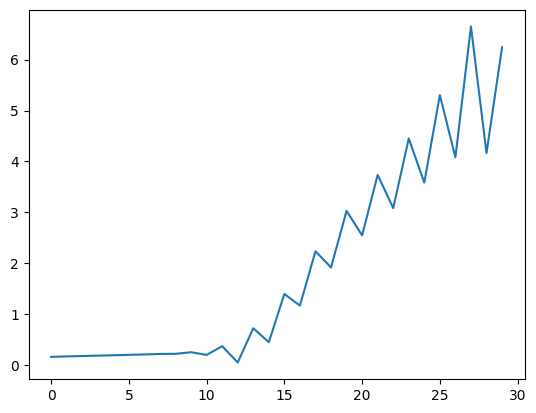

In [28]:
weight = []
for i in range(d1):
    weight.append(np.abs(np.vdot(coherent_state,eig_sta_int[i])))

plt.plot(weight)
